# Customer Churn — Exploratory Data Analysis

**Dataset:** `customers.csv` — SaaS/subscription churn data (50,000 customers)

## 1. Imports & Data Loading

In [51]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Plot styling
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Load data
DATA_PATH = Path("../data/customers.csv")
assert DATA_PATH.exists(), f"File not found: {DATA_PATH}"

df_raw = pd.read_csv(DATA_PATH)
df = df_raw.copy()

print(f"Shape: {df.shape}")
df.head()

Shape: (50000, 19)


,customer_id,signup_date,last_active,age,country,plan,monthly_fee,platform_primary,support_tier,acquisition_channel,sessions_per_week,avg_session_minutes,days_since_last_login,num_tickets_90d,payment_failures_180d,coupon_used_signup,discount_rate,month_last_active,churned
0,1,2021-10-03,2022-01-14,24,FR,standard,19.99,ios,chat,ads,1.27,25.06,6,2,0,1,0.20,1,1
1,2,2023-04-18,2024-04-19,36,IN,standard,19.99,ios,none,email,10.58,30.70,2,0,0,0,0.00,4,0
2,3,2021-08-31,2022-01-31,31,JP,basic,9.99,tv,none,email,1.36,14.60,26,0,0,0,0.00,1,0
3,4,2022-08-02,2024-05-12,42,CA,standard,19.99,ios,email,ads,13.37,17.88,18,1,0,1,0.15,5,0
4,5,2021-09-22,2022-04-15,40,UK,standard,19.99,web,email,organic,2.26,19.86,33,0,0,0,0.00,4,0


## 2. Data Overview

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            50000 non-null  int64  
 1   signup_date            50000 non-null  object 
 2   last_active            50000 non-null  object 
 3   age                    50000 non-null  int64  
 4   country                50000 non-null  object 
 5   plan                   50000 non-null  object 
 6   monthly_fee            50000 non-null  float64
 7   platform_primary       50000 non-null  object 
 8   support_tier           50000 non-null  object 
 9   acquisition_channel    50000 non-null  object 
 10  sessions_per_week      50000 non-null  float64
 11  avg_session_minutes    50000 non-null  float64
 12  days_since_last_login  50000 non-null  int64  
 13  num_tickets_90d        50000 non-null  int64  
 14  payment_failures_180d  50000 non-null  int64  
 15  co

In [53]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,50000.0,NaN,NaN,NaN,25000.5,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0
signup_date,50000,1095,2023-04-01,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_active,50000,1933,2023-07-20,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,50000.0,NaN,NaN,NaN,35.26654,9.660932,18.0,28.0,35.0,42.0,76.0
country,50000,10,US,10955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plan,50000,3,basic,24898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_fee,50000.0,NaN,NaN,NaN,17.261,8.724052,9.99,9.99,19.99,19.99,34.99
platform_primary,50000,4,android,17128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
support_tier,50000,4,chat,14951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acquisition_channel,50000,5,organic,22373,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values:")
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found.")

Missing values:
No missing values found.


In [55]:
# Unique values per column
df.nunique().sort_values()

churned                      2
coupon_used_signup           2
plan                         3
monthly_fee                  3
payment_failures_180d        4
support_tier                 4
platform_primary             4
discount_rate                5
acquisition_channel          5
num_tickets_90d              6
country                     10
month_last_active           12
age                         58
days_since_last_login      172
signup_date               1095
last_active               1933
sessions_per_week         1976
avg_session_minutes       3890
customer_id              50000
dtype: int64

## 3. Data Cleaning & Feature Engineering

In [56]:
# Parse date columns
for col in ["signup_date", "last_active"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# Compute customer tenure in days
if "signup_date" in df.columns and "last_active" in df.columns:
    df["tenure_days"] = (df["last_active"] - df["signup_date"]).dt.days

# Bin tenure for visualization
if "tenure_days" in df.columns:
    df["tenure_bin"] = pd.cut(
        df["tenure_days"],
        bins=[-1, 30, 90, 180, 365, 730, df["tenure_days"].max() + 1],
        labels=["0-30d", "31-90d", "91-180d", "181-365d", "1-2yr", "2yr+"]
    )

# Drop customerID (not useful for analysis)
if "customer_id" in df.columns:
    df.drop(columns=["customer_id"], inplace=True)

print(f"Cleaned shape: {df.shape}")
df.head()

Cleaned shape: (50000, 20)


,signup_date,last_active,age,country,plan,monthly_fee,platform_primary,support_tier,acquisition_channel,sessions_per_week,avg_session_minutes,days_since_last_login,num_tickets_90d,payment_failures_180d,coupon_used_signup,discount_rate,month_last_active,churned,tenure_days,tenure_bin
0,2021-10-03,2022-01-14,24,FR,standard,19.99,ios,chat,ads,1.27,25.06,6,2,0,1,0.20,1,1,103,91-180d
1,2023-04-18,2024-04-19,36,IN,standard,19.99,ios,none,email,10.58,30.70,2,0,0,0,0.00,4,0,367,1-2yr
2,2021-08-31,2022-01-31,31,JP,basic,9.99,tv,none,email,1.36,14.60,26,0,0,0,0.00,1,0,153,91-180d
3,2022-08-02,2024-05-12,42,CA,standard,19.99,ios,email,ads,13.37,17.88,18,1,0,1,0.15,5,0,649,1-2yr
4,2021-09-22,2022-04-15,40,UK,standard,19.99,web,email,organic,2.26,19.86,33,0,0,0,0.00,4,0,205,181-365d


## 4. Target Variable Distribution

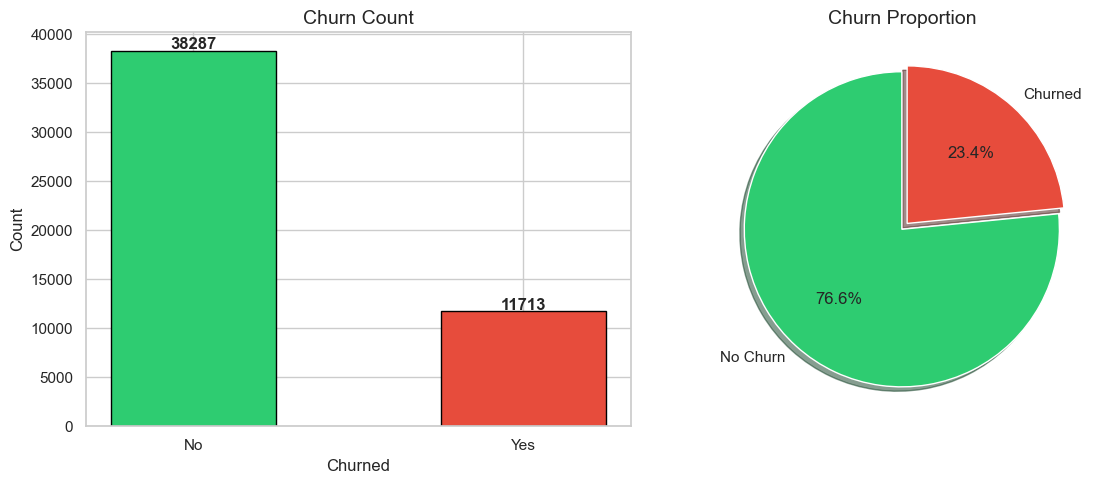

Churn rate: 23.4%


In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
churn_counts = df["churned"].value_counts()
colors = ["#2ecc71", "#e74c3c"]
axes[0].bar(churn_counts.index.map({0: "No", 1: "Yes"}), churn_counts.values,
            color=colors, edgecolor="black", width=0.5)
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 200, str(v), ha="center", fontweight="bold")
axes[0].set_title("Churn Count")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Churned")

# Pie chart
axes[1].pie(churn_counts.values, labels=["No Churn", "Churned"],
            autopct="%1.1f%%", colors=colors, startangle=90,
            explode=(0, 0.05), shadow=True)
axes[1].set_title("Churn Proportion")

plt.tight_layout()
plt.show()

print(f"Churn rate: {df['churned'].mean():.1%}")

## 5. Numerical Features

In [58]:
num_cols = df.select_dtypes(include=[np.number]).columns.drop("churned").tolist()
print(f"Numerical columns ({len(num_cols)}): {num_cols}")

Numerical columns (11): ['age', 'monthly_fee', 'sessions_per_week', 'avg_session_minutes', 'days_since_last_login', 'num_tickets_90d', 'payment_failures_180d', 'coupon_used_signup', 'discount_rate', 'month_last_active', 'tenure_days']


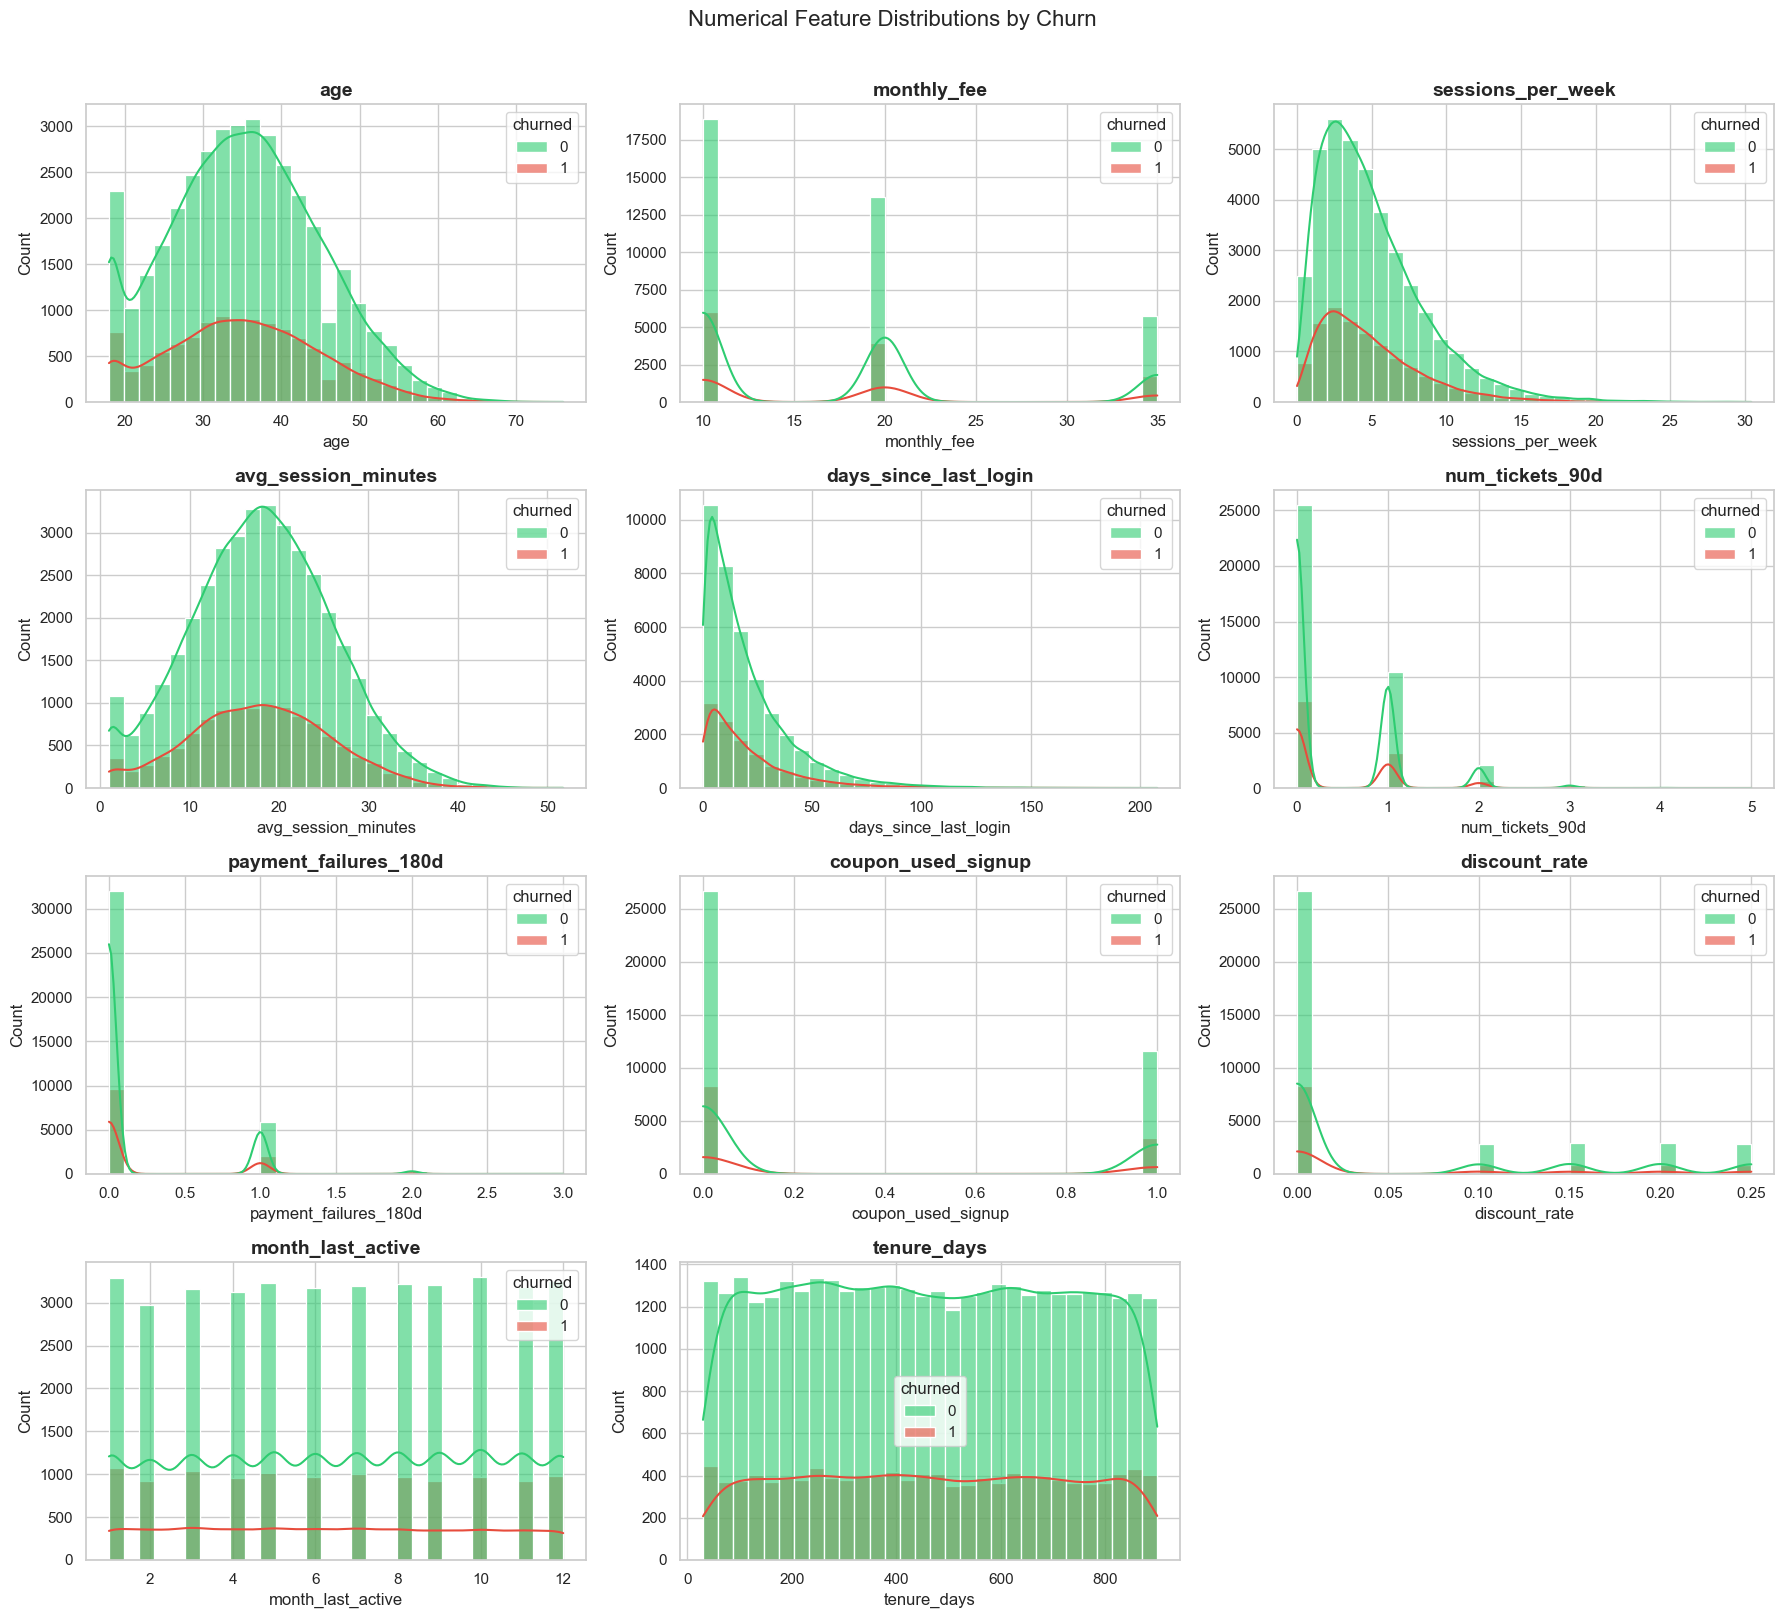

In [59]:
# Histograms by churn
n_cols = 3
n_rows = -(-len(num_cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, hue="churned", kde=True, ax=axes[i],
                 palette=["#2ecc71", "#e74c3c"], bins=30, alpha=0.6)
    axes[i].set_title(f"{col}", fontweight="bold")

for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Numerical Feature Distributions by Churn", fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

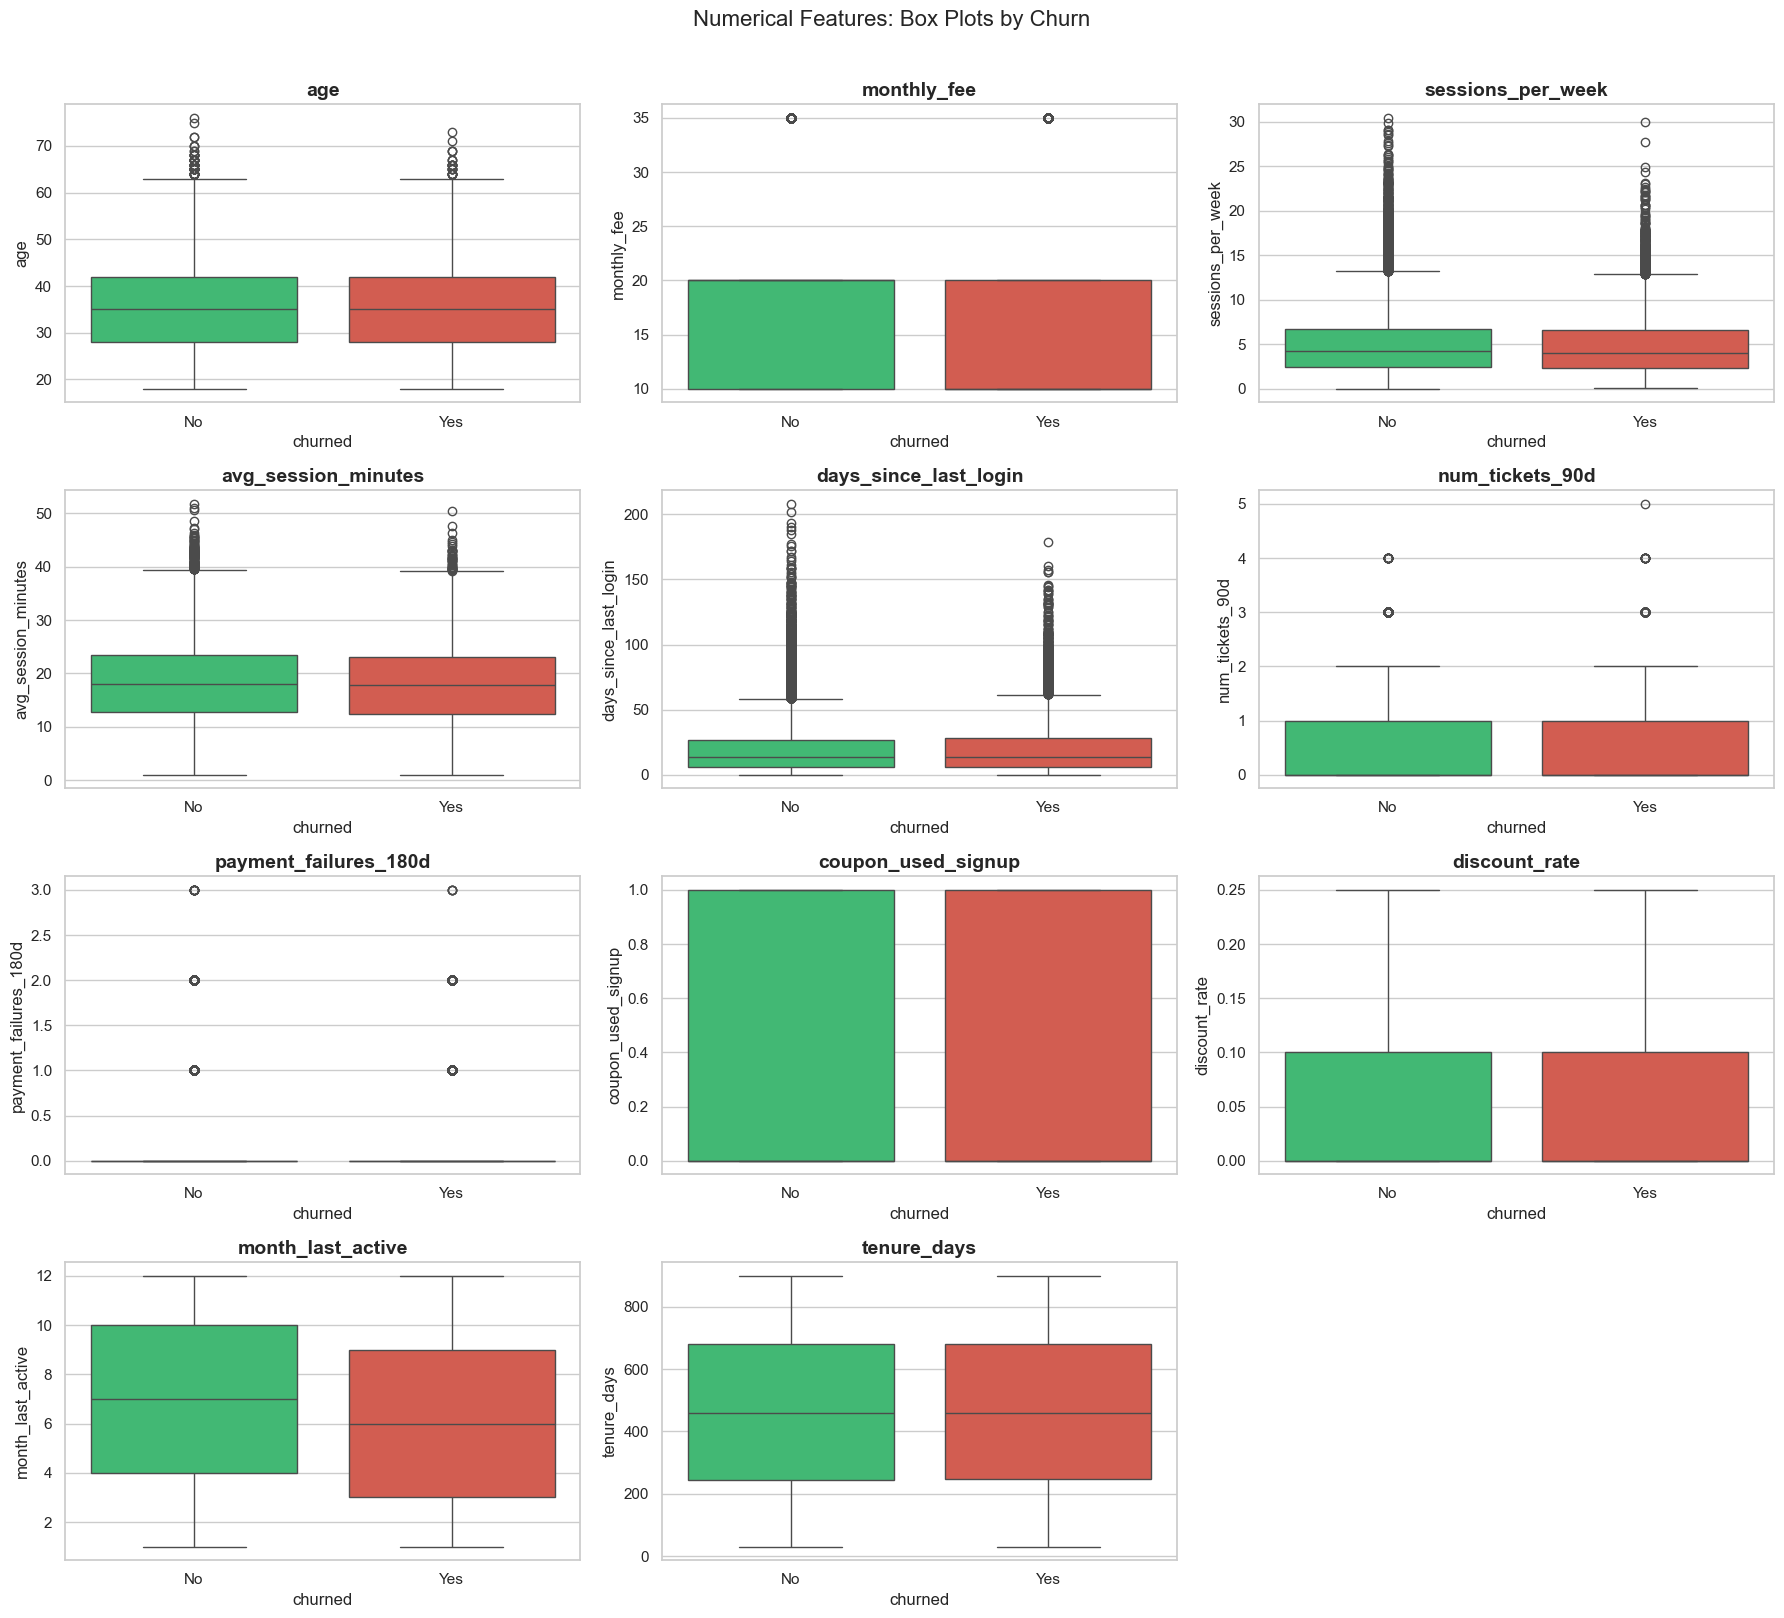

In [60]:
# Box plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x="churned", y=col, ax=axes[i],
                palette=["#2ecc71", "#e74c3c"])
    axes[i].set_xticklabels(["No", "Yes"])
    axes[i].set_title(f"{col}", fontweight="bold")

for j in range(len(num_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Numerical Features: Box Plots by Churn", fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

## 6. Categorical Features vs Churn

In [61]:
cat_cols = df.select_dtypes(include=["object", "string", "category"]).columns.tolist()
# Exclude date-derived or high-cardinality
cat_cols = [c for c in cat_cols if c not in ("signup_date", "last_active")]
print(f"Categorical columns ({len(cat_cols)}): {cat_cols}")

Categorical columns (6): ['country', 'plan', 'platform_primary', 'support_tier', 'acquisition_channel', 'tenure_bin']


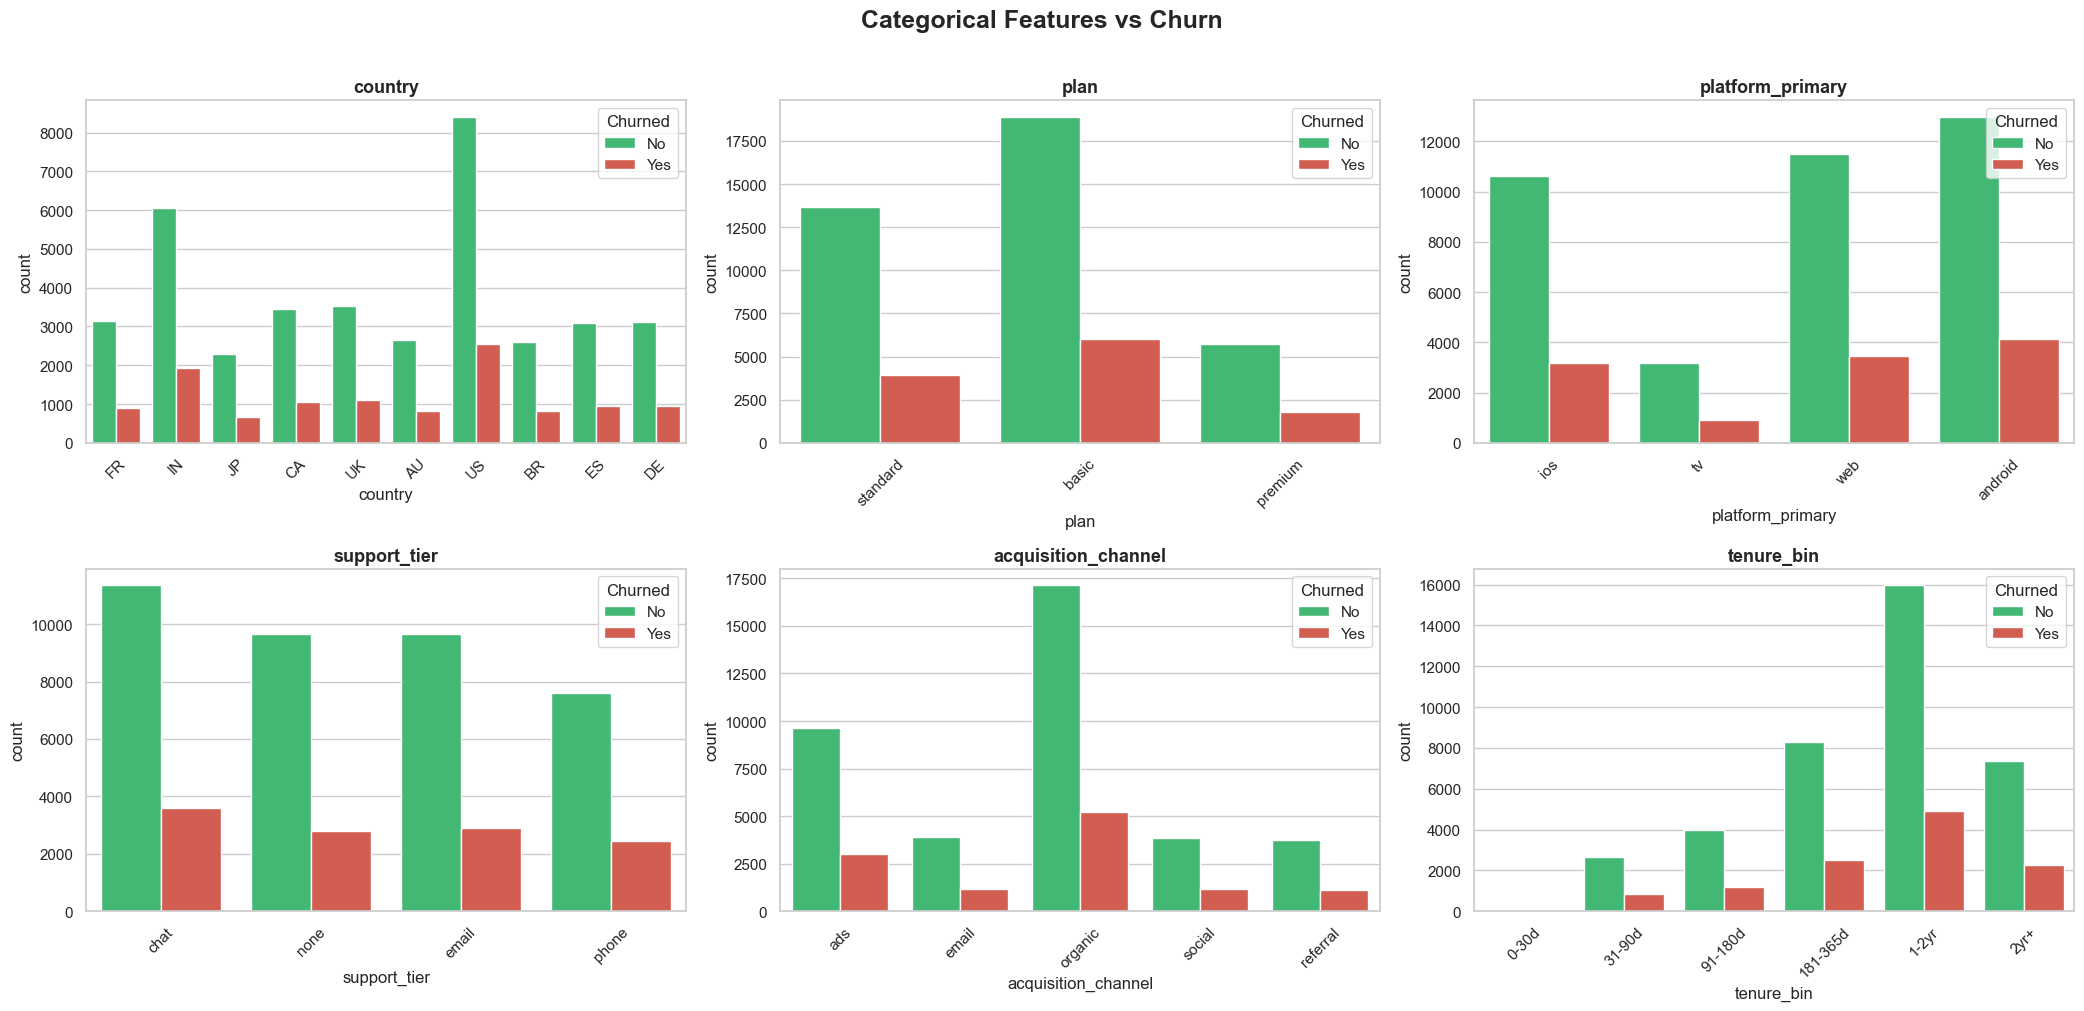

In [62]:
n_cols = 3
n_rows = -(-len(cat_cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue="churned", ax=axes[i],
                  palette=["#2ecc71", "#e74c3c"])
    axes[i].set_title(col, fontsize=13, fontweight="bold")
    axes[i].tick_params(axis="x", rotation=45)
    axes[i].legend(title="Churned", labels=["No", "Yes"])

for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Categorical Features vs Churn", fontsize=18, fontweight="bold", y=1.01)
plt.tight_layout()
plt.show()

## 7. Churn Rate by Key Features

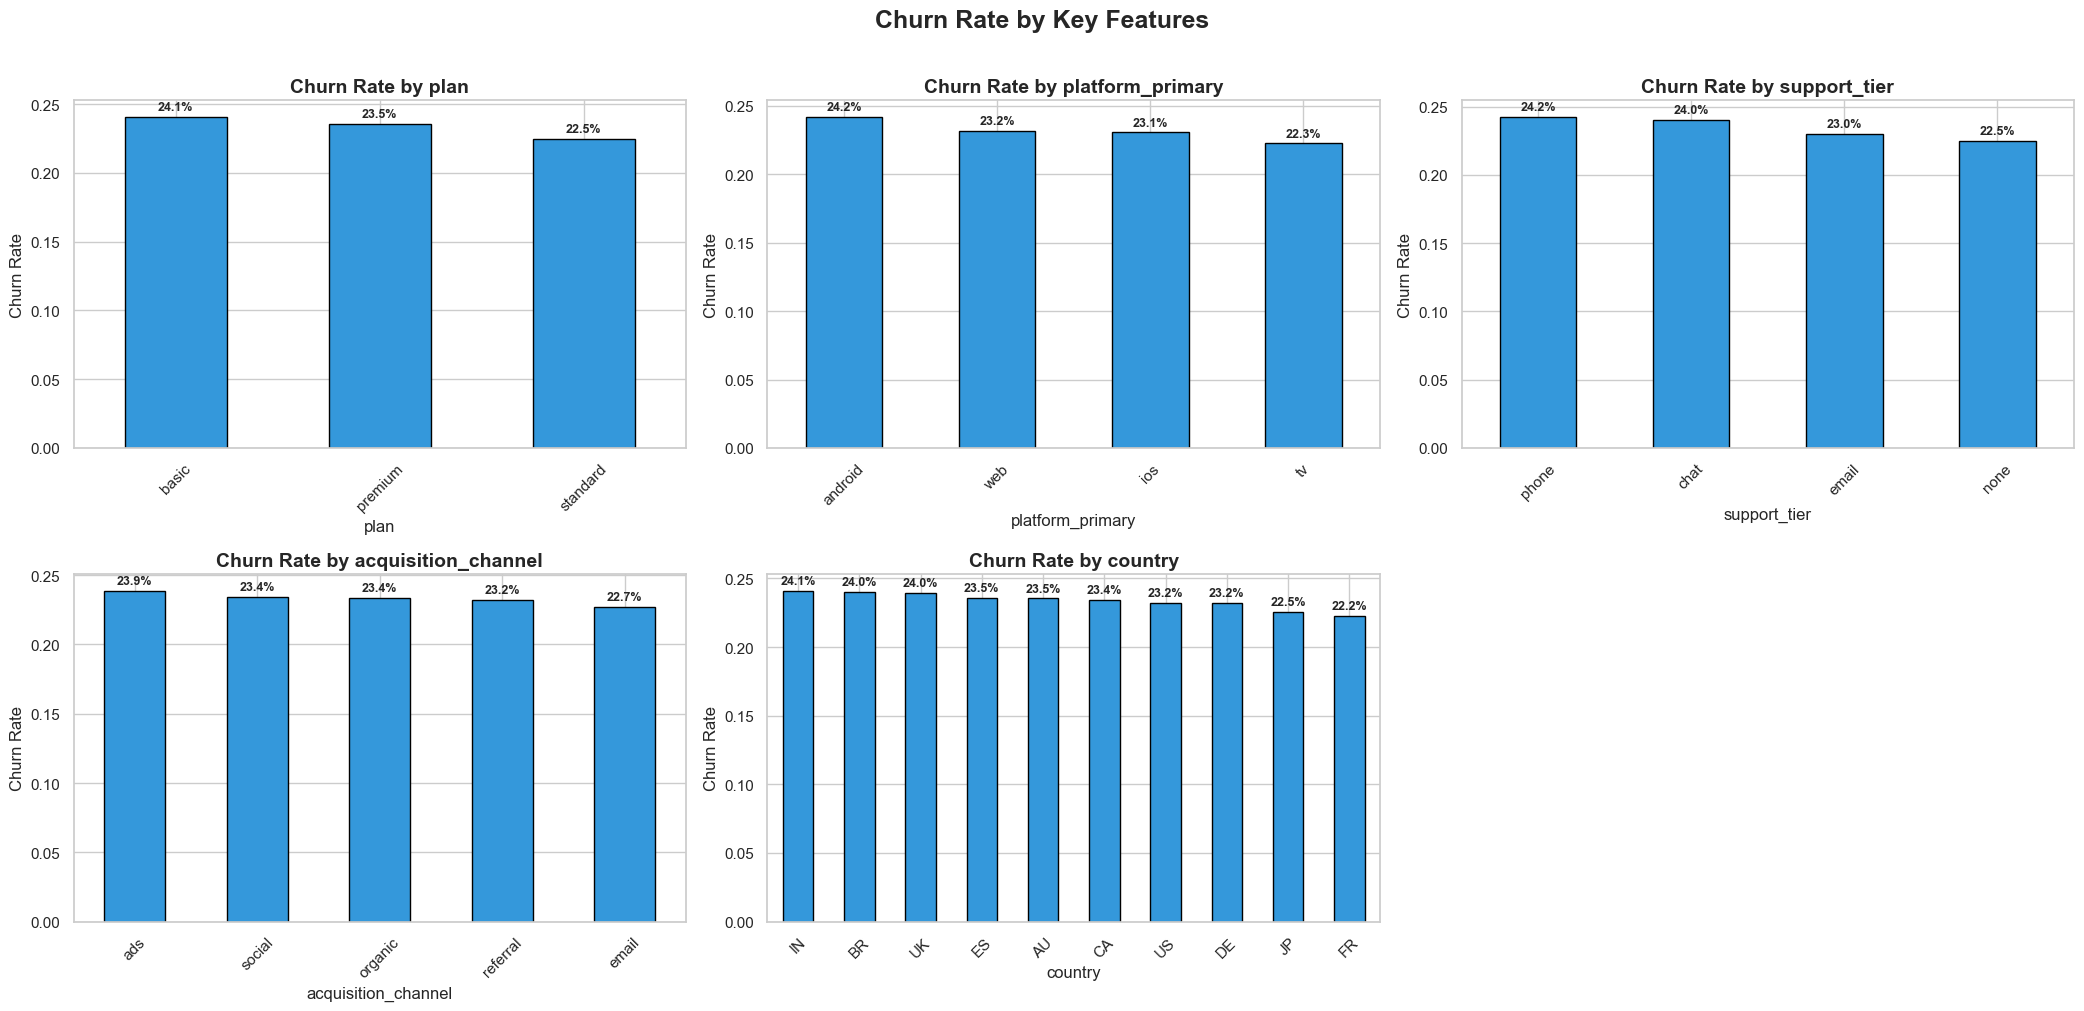

In [63]:
key_features = ["plan", "platform_primary", "support_tier",
                "acquisition_channel", "country"]

n_cols = 3
n_rows = -(-len(key_features) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(key_features):
    if col in df.columns:
        churn_rate = df.groupby(col)["churned"].mean().sort_values(ascending=False)
        churn_rate.plot(kind="bar", ax=axes[i], color="#3498db", edgecolor="black")
        axes[i].set_title(f"Churn Rate by {col}", fontweight="bold")
        axes[i].set_ylabel("Churn Rate")
        axes[i].tick_params(axis="x", rotation=45)
        for j, v in enumerate(churn_rate.values):
            axes[i].text(j, v + 0.005, f"{v:.1%}", ha="center", fontweight="bold", fontsize=9)

for j in range(len(key_features), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Churn Rate by Key Features", fontsize=18, fontweight="bold", y=1.01)
plt.tight_layout()
plt.show()

## 8. Tenure & Engagement Analysis

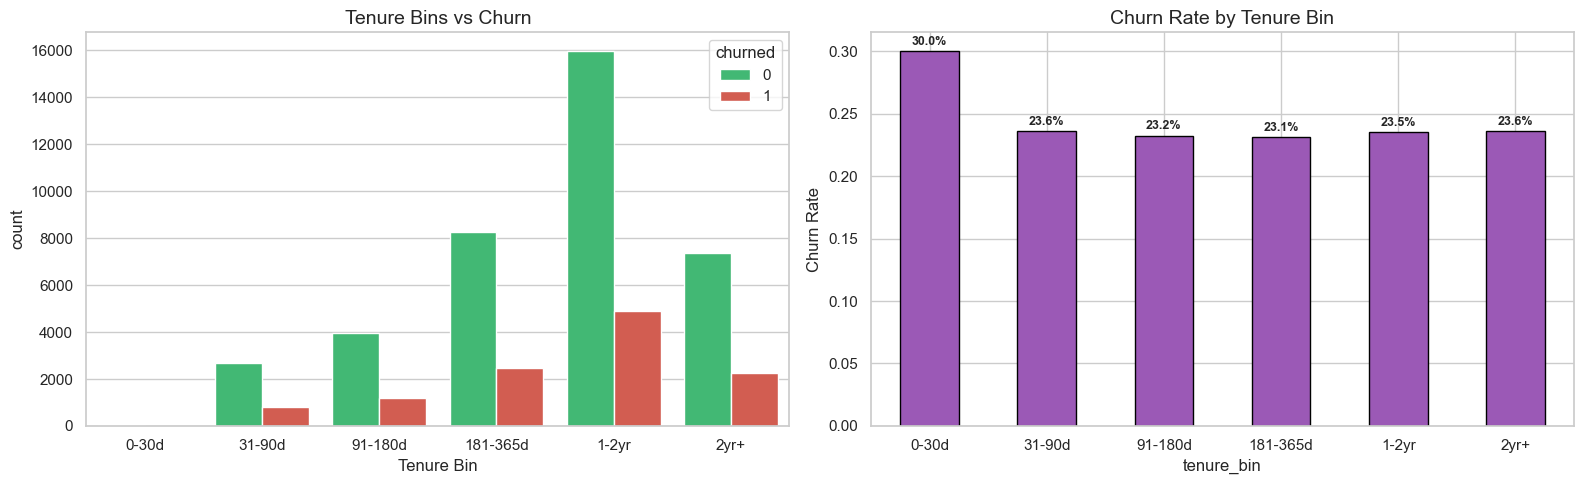

In [64]:
if "tenure_bin" in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # Count by tenure bin
    sns.countplot(data=df, x="tenure_bin", hue="churned", ax=axes[0],
                  palette=["#2ecc71", "#e74c3c"])
    axes[0].set_title("Tenure Bins vs Churn")
    axes[0].set_xlabel("Tenure Bin")

    # Churn rate by tenure bin
    churn_by_tenure = df.groupby("tenure_bin", observed=False)["churned"].mean()
    churn_by_tenure.plot(kind="bar", ax=axes[1], color="#9b59b6", edgecolor="black")
    axes[1].set_title("Churn Rate by Tenure Bin")
    axes[1].set_ylabel("Churn Rate")
    axes[1].tick_params(axis="x", rotation=0)
    for j, v in enumerate(churn_by_tenure.values):
        axes[1].text(j, v + 0.005, f"{v:.1%}", ha="center", fontweight="bold", fontsize=9)

    plt.tight_layout()
    plt.show()

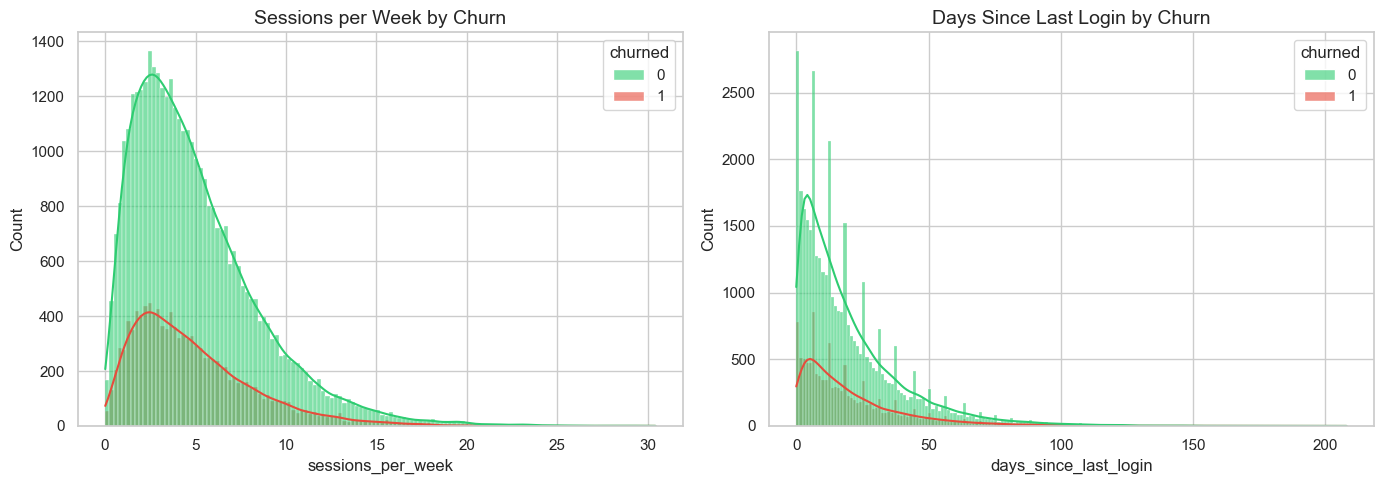

In [65]:
# Sessions vs churn
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=df, x="sessions_per_week", hue="churned", kde=True, ax=axes[0],
             palette=["#2ecc71", "#e74c3c"], alpha=0.6)
axes[0].set_title("Sessions per Week by Churn")

sns.histplot(data=df, x="days_since_last_login", hue="churned", kde=True, ax=axes[1],
             palette=["#2ecc71", "#e74c3c"], alpha=0.6)
axes[1].set_title("Days Since Last Login by Churn")

plt.tight_layout()
plt.show()

## 9. Correlation Analysis

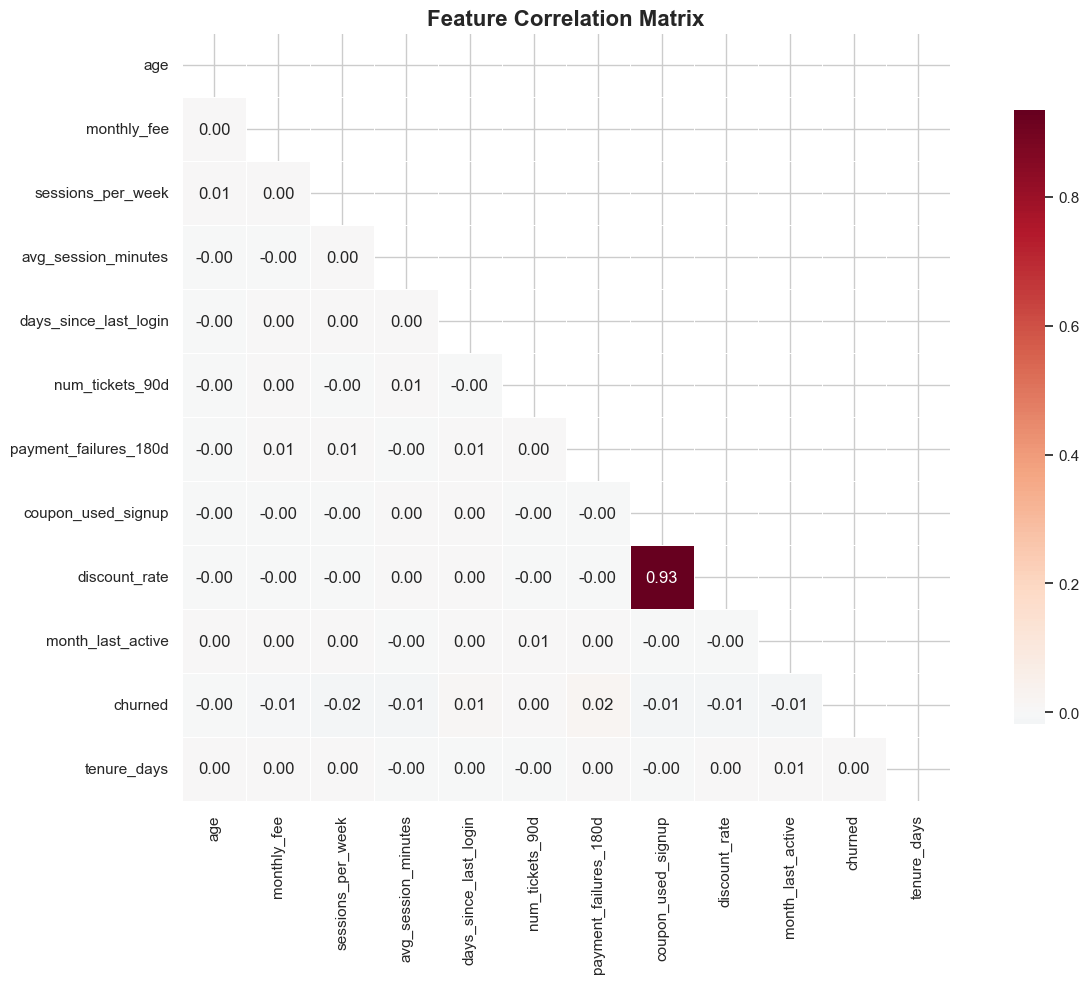

In [66]:
num_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
corr = num_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="RdBu_r",
            center=0, linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Matrix", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

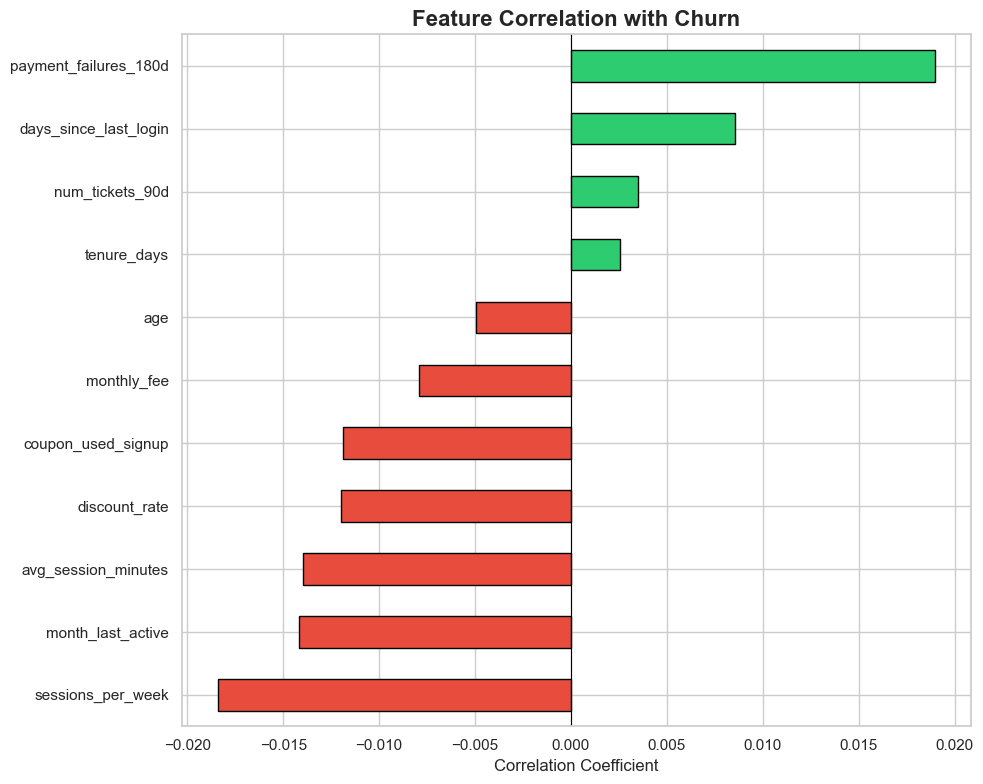

In [67]:
# Correlation with churn (sorted)
churn_corr = corr["churned"].drop("churned").sort_values()
plt.figure(figsize=(10, 8))
colors = ["#e74c3c" if x < 0 else "#2ecc71" for x in churn_corr.values]
churn_corr.plot(kind="barh", color=colors, edgecolor="black")
plt.title("Feature Correlation with Churn", fontsize=16, fontweight="bold")
plt.xlabel("Correlation Coefficient")
plt.axvline(x=0, color="black", linewidth=0.8)
plt.tight_layout()
plt.show()

## 10. Monthly Fee vs Engagement

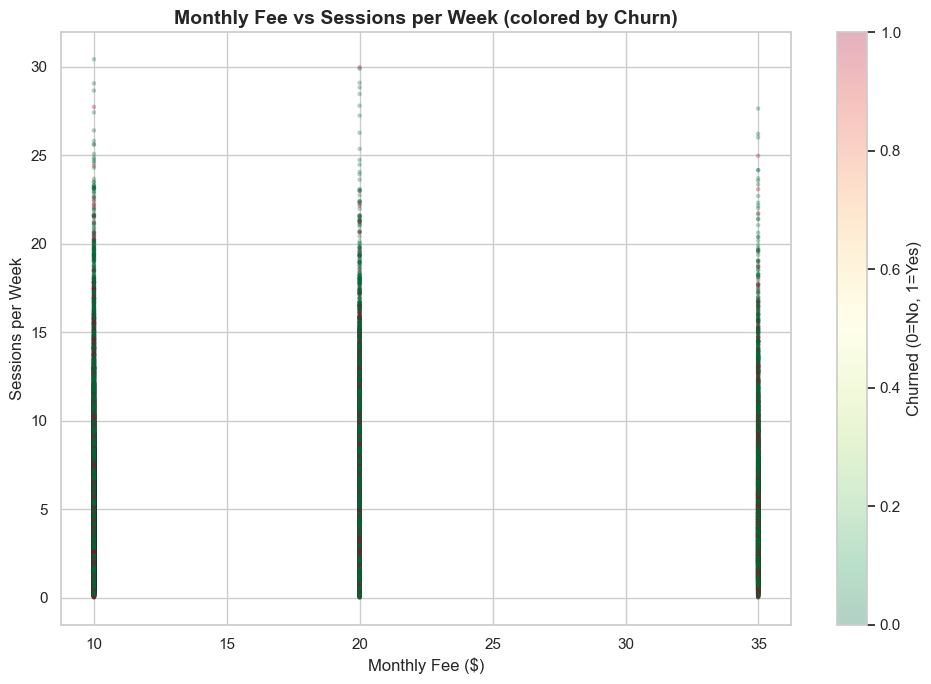

In [68]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df["monthly_fee"], df["sessions_per_week"],
                      c=df["churned"], cmap="RdYlGn_r", alpha=0.3, s=10, edgecolors="none")
plt.colorbar(scatter, label="Churned (0=No, 1=Yes)")
plt.xlabel("Monthly Fee ($)")
plt.ylabel("Sessions per Week")
plt.title("Monthly Fee vs Sessions per Week (colored by Churn)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

## 11. Key Takeaways

**Observations from EDA:**

1. **Dataset**: 50,000 customers across multiple countries, plans, and platforms
2. **Churn Rate**: Check the distribution above for the exact rate
3. **Tenure**: Newer customers (shorter tenure) tend to churn more
4. **Engagement**: Customers with fewer sessions per week and more days since last login are more likely to churn
5. **Payment Failures**: Likely a strong predictor — customers with payment failures in the last 180 days churn more
6. **Support Tickets**: Higher support ticket counts may correlate with churn
7. **Plan & Pricing**: Differences in churn rates across plans and fee levels
8. **Acquisition Channel**: Some channels may bring in less sticky customers
9. **Coupons/Discounts**: Whether coupon use at signup affects retention

These insights should guide feature selection for the modeling pipeline notebook (`cc_modeling_pipeline.ipynb`).